In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
#import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 
from keras.regularizers import l2
from keras import layers
from keras import Model
import keras
from keras.layers import Conv2D, Conv2DTranspose
#181180060-assignment-2

In [8]:
#importing MNIST Dataset Exploration
(X_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #load the data

In [9]:
print(X_train.shape) #mnist data set has 60000 sample with 28 28 matrix dimensions
print(X_train[0].shape) #each element

(60000, 28, 28)
(28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [10]:
#prepare the train mnist data for autoencoder
#normalize the train mnist data for range between 0 and 1 and flatten 28x28 data
X_train = X_train.astype('float32')/255.0 #first float
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) #flatten
print(X_train.shape) #shape of x_train

(60000, 784)


In [11]:
#autoencoder is a neural network type that learns from unlabelled data and take same input and same ouput type 
#we will train our autoencoder with MNIST data set digit image representations and take the prediction output representations
#First we built our autoencoder neural network layers (Sequential) 
# a compression autoencoder that has a simple framework
from tensorflow.keras.optimizers import Adam #we will use Adam optimizer

#model = Sequential()
input_layer = tf.keras.Input(shape=(X_train.shape[1],)) #input layer shape is 784
first_hidden_layer = Dense(128, activation='sigmoid')(input_layer) #first hidden layer of encoder
coding_layer = Dense(32, activation='sigmoid')(first_hidden_layer) #coding layer 
second_hidden_layer = Dense(128, activation='sigmoid')(coding_layer) #first hidden layer of decoder 
last_layer = Dense(784, activation='sigmoid')(second_hidden_layer) #last layer 

auto_model = tf.keras.Model(input_layer, last_layer) #construct the autoencoder model

auto_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01)) #we use mean squared error as reconstruction loss and Adam optimizer as our optimizer
auto_model.fit(X_train, X_train, verbose=0, epochs=5) #First we try 5 epoch 

In [12]:
#reshape the test data first float32 then flatten
x_test = x_test.astype('float32') / 255.0 #floar32 turning
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) #flatten for autoencoder
print(x_test.shape) #shape of x_test

(10000, 784)


In [13]:
pred_imgs = auto_model.predict(x_test) #predict the images with autoencoder

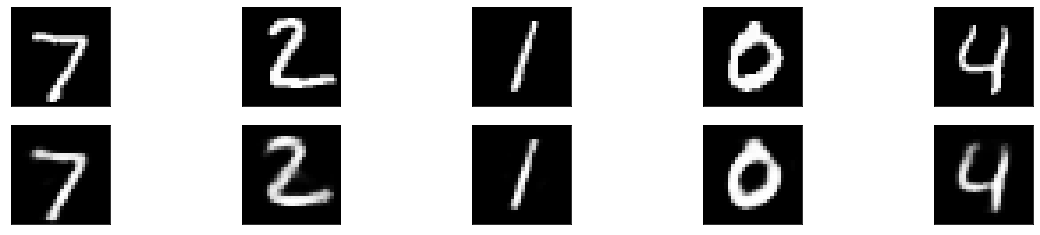

In [14]:
#prediction result for the 5 epoch trying
#we show first n digit of mnist dataset 
import random
n_digit = 5
plt.figure(figsize=(20, 4))
for i in range(n_digit):
  #random_nu = random.randint(0, 9999) #there is 10000 example 
  ax = plt.subplot(2, n_digit, i + 1)
  plt.imshow(x_test[i].reshape(28, 28)) #reshape the x test and plot the x test
  plt.gray()
  ax.get_xaxis().set_visible(False) #set the x axis 
  ax.get_yaxis().set_visible(False) #set the y axis

  if i == n_digit/2:
    ax.set_title('Original MNIST images') #set the title

  #decoded_img = model.predict(x_test[random_nu])
  ax = plt.subplot(2, n_digit, i + 1 + n_digit) #plot the figure
  plt.imshow(pred_imgs[i].reshape(28, 28)) #plot the prediction images
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == n_digit/2:
    ax.set_title('Reconstructed MNIST images') #set the title

plt.show()

In [15]:
#First row shows the original mnist images
#second row shows the constructed mnist images
#epoch 5 has a overally good performance if a comparison is made but in some digits the performance have stalled

In [16]:
#we define a show images fonction that includes plotting of figure and random images that plot the original images and constructed images that random implications
def show_images(autoencoder):
  n_digit = 5
  plt.figure(figsize=(20, 4))
  for i in range(n_digit):
    random_nu = random.randint(0, 9999) #there is 10000 example we assign random numbers for image plotting
    ax = plt.subplot(2, n_digit, i + 1)
    plt.imshow(x_test[random_nu].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    if i == n_digit/2:
      ax.set_title('Original MNIST images')

    #decoded_img = model.predict(x_test[random_nu])
    ax = plt.subplot(2, n_digit, i + 1 + n_digit)
    plt.imshow(pred_imgs[random_nu].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit/2:
      ax.set_title('Constructed MNIST images')
  plt.show()

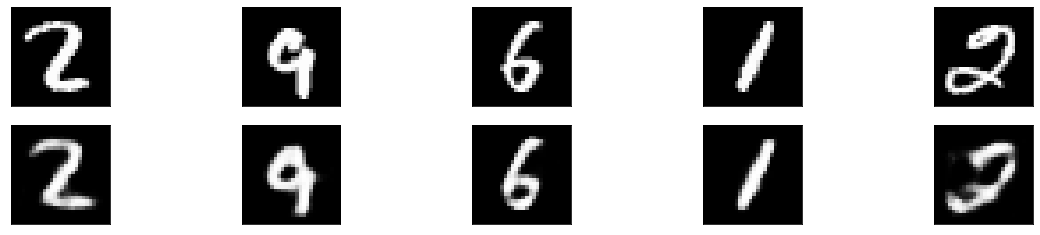

In [17]:
#For stopping at the 5 epoch we define a auto_model fit again that stops at end of 20 epoch this time
auto_model.fit(X_train, X_train, verbose=0, epochs=20) #for epoch 20
show_images(auto_model) #show images

In [18]:
#First row shows the original images
#Second row shows the constructed images 
#In epoch 20 there is a slight improvement that same there digit that have different shapes also in constructed images  

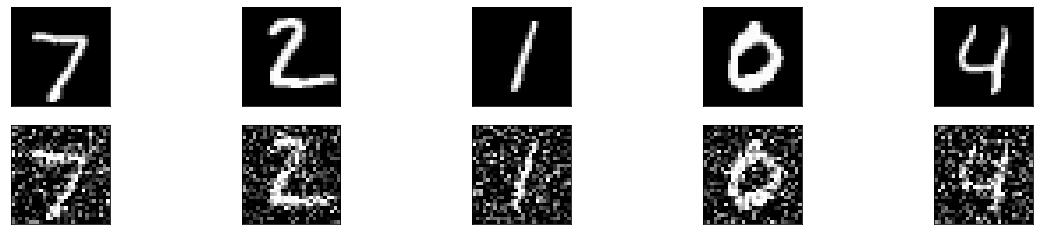

In [19]:
#b. Denoising Autoencoder
#for denoising autoencoder we reconstruct our MNIST data set with a noise factor we denoise the images and show the first 5 mnist images
noise_factor = 0.4 #noise factor
X_train_noise = X_train + noise_factor*np.random.normal(size=X_train.shape) #X train noise adding noise
x_test_noise = x_test + noise_factor*np.random.normal(size=x_test.shape) #X test adding noise
X_train_noise = np.clip(X_train_noise, 0.0, 1.0) #clip the noise
x_test_noise = np.clip(x_test_noise, 0.0, 1.0) #clip the noise
n_digit = 5 #use 5 digit number 
plt.figure(figsize=(20, 4)) #plot the figure according to figsize 
for i in range(n_digit):
    #show the original image
    ax = plt.subplot(2, n_digit, i + 1)
    plt.imshow(x_test[i].reshape(28, 28)) #plot the x test image
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit/2:
        ax.set_title('Original Images')

    # show the image with noise
    ax = plt.subplot(2, n_digit, i + 1 + n_digit)
    plt.imshow(x_test_noise[i].reshape(28, 28)) #plot the noisy x text images 
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit/2:
        ax.set_title('Noisy Input')

In [20]:
#reconstruct the model for noise images in the same base that a step has
input_layer = tf.keras.Input(shape=(X_train.shape[1],)) #input layer shape is 784
first_hidden_layer = Dense(128, activation='sigmoid')(input_layer) #first hidden layer of encoder
coding_layer = Dense(32, activation='sigmoid')(first_hidden_layer) #coding layer 
second_hidden_layer = Dense(128, activation='sigmoid')(coding_layer) #first hidden layer of decoder 
last_layer = Dense(784, activation='sigmoid')(second_hidden_layer) #last layer 

auto_model = tf.keras.Model(input_layer, last_layer) #construct the autoencoder model

auto_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01)) #we use mean squared error as reconstruction loss and Adam optimizer as our optimizer
auto_model.fit(X_train_noise, X_train, verbose=0, epochs=5) #first we try 5 epoch and use denoised train images instead of normal X_train 


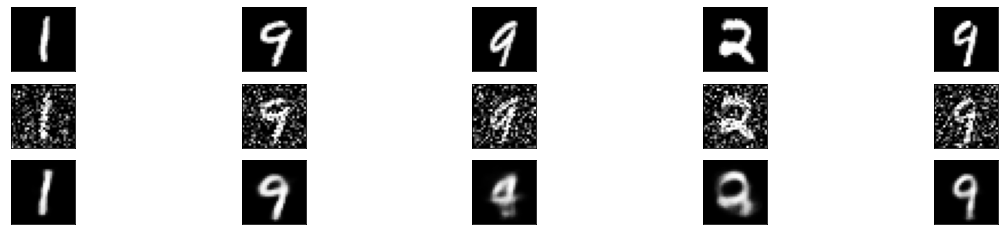

In [21]:
#construct prediction images
pre_img_n = auto_model.predict(x_test_noise) #predict the images from noisy original x test images
n_digit_n = 5
plt.figure(figsize=(20, 4))
for i in range(n_digit_n):
    # plot original image
    random_nu = random.randint(0, 9999) #there is 10000 example
    ax = plt.subplot(3, n_digit_n, i + 1) #plot the first original images row
    plt.imshow(x_test[random_nu].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit_n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n_digit_n, i + 1 + n_digit_n) #plot the noisy images row that is derived from originals
    plt.imshow(x_test_noise[random_nu].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit_n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n_digit_n, i + 1 + 2*n_digit_n) #plot the reconstructed images that is from noisy test images
    plt.imshow(pre_img_n[random_nu].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit_n/2:
        ax.set_title('Autoencoder Output')

In [ ]:
#First row shows the original images 
#The second row shows the noisy image 
#The third row shows the autoencoder output 
#In 5 epoch training for at least two images are not good enough for the performance remaining ones are good four and eight digits are bad 

In [22]:
#Then we train the same auto model for 20 epoch
auto_model.fit(X_train_noise, X_train, verbose=0, epochs=20) #we try to 20 epochs and then show the constructed images 

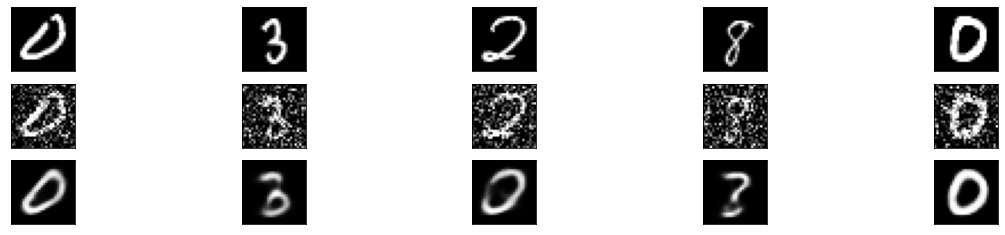

In [23]:
pre_img_n_twenty = auto_model.predict(x_test_noise) #predict the x test noise images in 20 epoch 
n_digit_n = 5
plt.figure(figsize=(20, 4))
for i in range(n_digit_n):
    # plot original image
    random_nu = random.randint(0, 9999) #there is 10000 example
    ax = plt.subplot(3, n_digit_n, i + 1)
    plt.imshow(x_test[random_nu].reshape(28, 28)) #plot the x test images
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit_n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n_digit_n, i + 1 + n_digit_n)
    plt.imshow(x_test_noise[random_nu].reshape(28, 28)) #plot the noisy original images
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit_n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n_digit_n, i + 1 + 2*n_digit_n) #plot the reconstructed images from noisy x test images 
    plt.imshow(pre_img_n_twenty[random_nu].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n_digit_n/2:
        ax.set_title('Autoencoder Output')

In [ ]:
#First row shows original images
#Second row shows noisy images
#Third row shows autoencoder images 
#In 20 epoch training we got better results that every image shows is matched with their original images that is noised

In [24]:
#c. sparse autoencoders 
#for sprase encoders we implement regularization to cost function and reconstruct the auto model with a regularizer with 0.01 sparcity
input_layer = tf.keras.Input(shape=(X_train.shape[1],)) #input layer shape is 784
first_hidden_layer = Dense(128, activation='sigmoid', activity_regularizer=l2(0.01))(input_layer) #first hidden layer of encoder l2 regularizer as activity regularizer
coding_layer = Dense(32, activation='sigmoid')(first_hidden_layer) #coding layer we apply regularizer to the cost function through
second_hidden_layer = Dense(128, activation='sigmoid')(coding_layer) #first hidden layer of decoder 
last_layer = Dense(784, activation='sigmoid')(second_hidden_layer) #last layer 

auto_model = tf.keras.Model(input_layer, last_layer) #construct the autoencoder model

auto_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01)) #we use mean squared error as reconstruction loss and Adam optimizer as our optimizer
auto_model.fit(X_train, X_train, verbose=0, epochs=20) #we try for 20 epoch for X_train 

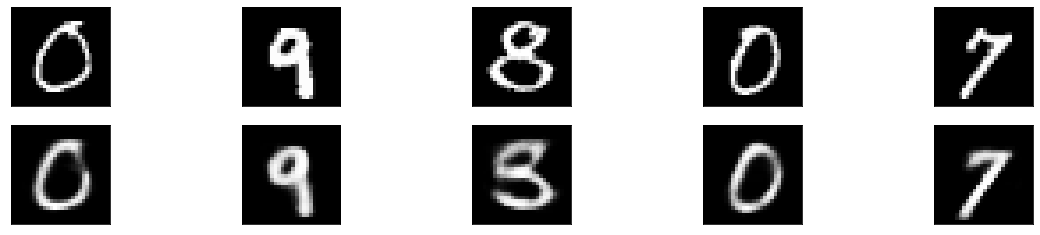

In [25]:
pre_img_re = auto_model.predict(x_test) #predict the images with regularizer model
n_digit_re = 5
plt.figure(figsize=(20, 4))
for i in range(n_digit_re):
  #show a random image in range 0-9999 range
  random_nu = random.randint(0, 9999) #there is 10000 example 
  ax = plt.subplot(2, n_digit_re, i + 1)
  plt.imshow(x_test[random_nu].reshape(28, 28)) #show the x test original images
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  if i == n_digit/2:
    ax.set_title('Original MNIST images')

   #decoded_img = model.predict(x_test[random_nu])
  ax = plt.subplot(2, n_digit_re, i + 1 + n_digit) #plot the contructed Regularizer images 
  plt.imshow(pre_img_re[random_nu].reshape(28, 28)) #show the regularized 
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == n_digit/2:
    ax.set_title('Constructed Regularizer MNIST images')
plt.show()

In [ ]:
#First row shows original images 
#Second row shows predicted images with additional regularizer 
#we see that l2 regularizer auto_model get a good result with the images with minar abnormilites with some complex digits

In [2]:
#d. Variational autoencoder using autoencoder
#Variational autoencoder use KL-divergence as a loss function and we built our encoder and decoder functions with connected to KL-divergence lost 
#and we built a convolutional layer system that has 128 filter nodes and 64 filter nodes

#we built the sampling class that includes base for KL-divergence logarithmic functions
class Sampling(layers.Layer):
  #uses z mean, z log to sample z
  def call(self, inputs):
    z_mean, z_log_var = inputs #z mean and log var variables
    batch = tf.shape(z_mean)[0] #we create the batch variable with z mean varible
    dim = tf.shape(z_mean)[1] #we create dimension dim 
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim)) #epsilon variable with bathi dim dimension
    return z_mean + tf.exp(0.5*z_log_var)*epsilon #return KL-divergence function value for loss 


In [3]:
latent_dim = 2 #latent dimension
encoder_inputs = tf.keras.Input(shape=((28, 28, 1))) #convolutional layer
x = Conv2D(128, 3, activation="relu", strides=2, padding="same")(encoder_inputs) #convolutional layer with 128 nodes
x = Conv2D(64, 3, activation="relu", strides=2, padding="same")(x) #convolutional layer 
x = layers.Flatten()(x) #flatten layer
x = Dense(16, activation="relu")(x) #last dense layer with 16 nodes
z_mean = Dense(latent_dim, name="z_mean")(x) #create a layer for z mean variable (Dense)
z_log_var = Dense(latent_dim, name="z_log_var")(x) #create a layer for z log var variable (Dense)
z = Sampling()([z_mean, z_log_var]) #use the sampling class for returning of KL-divergence function value
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder") #lastly create first encoder model with encoder input type and z_mean and z log var varibles
encoder.summary() #summary the encoder struture

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 128)  1280        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     73792       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

In [4]:
#built the decoder
latent_inputs = keras.Input(shape=(latent_dim,)) #Input layer
x = Dense(7 * 7 * 64, activation="relu")(latent_inputs) #dense layer
x = layers.Reshape((7, 7, 64))(x) #reshape the layer
x = Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x) #conv2d transpose with 64 nodes 
x = Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same")(x) #conv2d transpose with 128 nodes 
decoder_outputs = Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x) #conv2d transpose with half of latent value of dimension
decoder = Model(latent_inputs, decoder_outputs, name="decoder") #model decoder with latent inputs and decoder outputs
decoder.summary() #summary the decoder structure

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      73856     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        1153

In [5]:
#create the VAE model that implements the decoder and encoder functions with KL-divergence loss function value that tracks the loss value  
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder #define the encoder
        self.decoder = decoder #define the decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss") #define total loss tracker with mean total value
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(
            name="reconstruction_loss" #define reconstruction loss
        )
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss") #define the loss tracker with KL-divergence definition

    @property
    def metrics(self): #define property metrics 
        return [
            self.total_loss_tracker, #return the loss tracker
            self.reconstruction_loss_tracker, #return reconstruction loss
            self.kl_loss_tracker, #return loss tracker 
        ]

    def train_step(self, data): #train the gradient loss
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data) #use z mean z log var and z value as encoder function data
            reconstruction = self.decoder(z) #reconstruction with decoder function
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum( #trace the reconstruction loss with tensorflow reduce mean 
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2) #calculate binary cross entropy loss with data and reconstruction
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)) #compute the KL-divergence loss with z log var value square of z mean and exponential of z log var
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1)) #mean of KL-divergence loss with axis 1
            total_loss = reconstruction_loss + kl_loss #define the total loss
        grads = tape.gradient(total_loss, self.trainable_weights) #compute the loss gradients
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights)) #apply optimizer to gradients with weights
        self.total_loss_tracker.update_state(total_loss) #update the loss trace with total loss variable
        self.reconstruction_loss_tracker.update_state(reconstruction_loss) #update the reconstruction loss state 
        self.kl_loss_tracker.update_state(kl_loss) #update the KL-divergence loss during training process
        return { #return updates loss values
            "loss": self.total_loss_tracker.result(), #return total loss tracker
            "reconstruction_loss": self.reconstruction_loss_tracker.result(), #return reconstruction loss result
            "kl_loss": self.kl_loss_tracker.result(), #return KL-divergence loss result
        }

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #load image data again 
#mnist_data = np.concatenate([x_train, x_test], axis=0) #concatane mnis data
mnist_data = np.expand_dims(x_train, -1).astype("float32") / 255 #normalize the data
test_mnist_data = np.expand_dims(x_test, -1).astype("float32") / 255 #normalize test data
#define vae
vae = VAE(encoder, decoder) #VAE define wit encoder and decoder
vae.compile(optimizer=Adam(learning_rate=0.01)) #compile the optimizer Adam with 0.01 learning rate
vae.fit(mnist_data, epochs=20, batch_size=128) #define the fit of vae definition function

11501568/11490434 [==============================] - 0s 0us/step


NameError: ignored

In [ ]:
encoded_img = vae.encoder.predict(test_mnist_data) #encoded image

In [ ]:
print(np.array(encoded_img).shape) #print shape of img 
X = np.array(encoded_img) #turn encoded img into np array
X_input = X[0] #just take (70000, 2)
print(X_input.shape) #print X input shape
decoded_img = vae.decoder.predict(X_input) #decoded img

(3, 10000, 2)
(10000, 2)


In [ ]:
print(decoded_img.shape) #shape of decoded img array

(10000, 28, 28, 1)


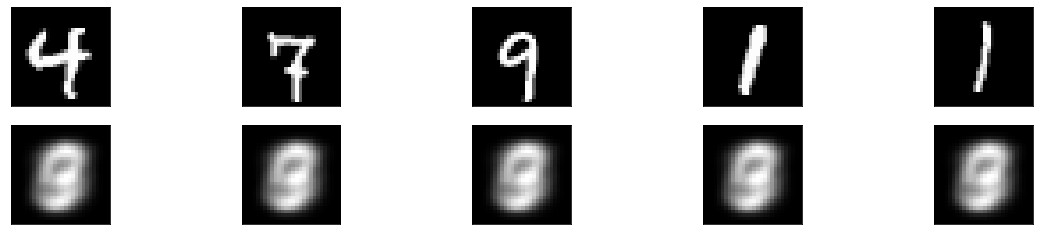

In [ ]:
n_digit = 5
plt.figure(figsize=(20, 4))
for i in range(n_digit):
  random_nu = random.randint(0, 9999) #we choose first 10000 sample of mnist data
  ax = plt.subplot(2, n_digit, i + 1)
  plt.imshow(test_mnist_data[random_nu].reshape(28, 28)) #plot the test mnist data 
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  if i == n_digit/2:
    ax.set_title('Original MNIST images')

    #decoded_img = model.predict(x_test[random_nu])
  ax = plt.subplot(2, n_digit, i + 1 + n_digit)
  plt.imshow(decoded_img[random_nu].reshape(28, 28)) #plot the decided image 
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == n_digit/2:
    ax.set_title('Constructed MNIST images')
plt.show()

In [ ]:
#First row shows the original test mnist data image 
#Second row shows the reconstruted images with KL-divergence  that is extremely different from original image counter parts 
#Addition of KL-diverge and convolution changes the structure of original images and obscure the images 